(psk)=
# Phase-shift keying

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sdr

%config InlineBackend.print_figure_kwargs = {"facecolor" : "w"}
# %matplotlib widget

In the {obj}`sdr` library, phase-shift keying modulation is available in the {obj}`sdr.PSK` class.

In [2]:
def analyze_psk(order, esn0, offset=0):
    # Create a PSK modulation object
    psk = sdr.PSK(order, offset=offset)

    # Generate random decimal symbols
    s = np.random.randint(0, order, 100_000)

    # Modulate decimal symbols to complex symbols
    x = psk.modulate(s)

    # Add AWGN to complex symbols to achieve desired Es/N0
    snr = sdr.esn0_to_snr(esn0, sps=1)
    x_hat = sdr.awgn(x, snr)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    # sdr.plot.constellation(x_hat, linestyle="none")
    sdr.plot.symbol_map(psk.symbol_map, limits=(-2, 2))
    plt.subplot(1, 2, 2)
    sdr.plot.constellation(x_hat, bins=75, heatmap=True, limits=(-2, 2))
    plt.title(f"Constellation at {esn0} dB $E_s/N_0$")
    plt.suptitle(f"{order}-PSK constellation")
    plt.tight_layout()
    plt.show()

    h_srrc = sdr.root_raised_cosine(0.1, 6, 10)
    tx_mf = sdr.FIRInterpolator(h_srrc, 10)
    y = tx_mf.filter(x)

    plt.figure(figsize=(10, 5))
    sdr.plot.time_domain(y[0:1000])
    plt.show()

## Constellations

### BPSK

/home/matt/repos/sdr/src/sdr/plot/_modulation.py:68: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_215588/3575726410.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


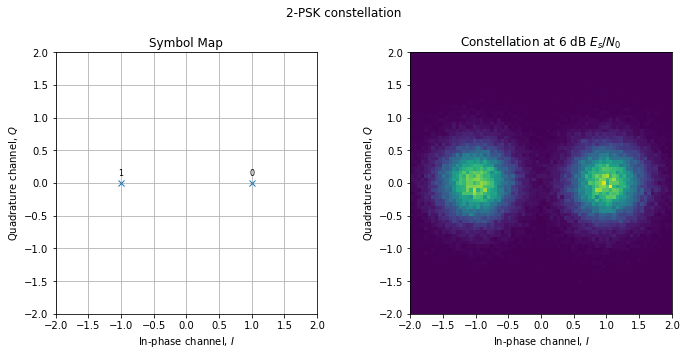

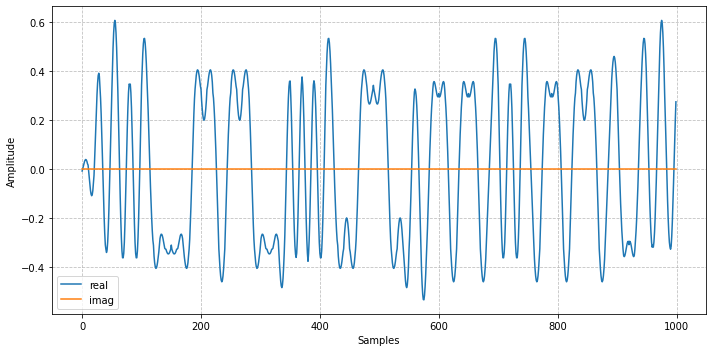

In [3]:
analyze_psk(2, 6)

### QPSK

/home/matt/repos/sdr/src/sdr/plot/_modulation.py:68: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_215588/3575726410.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


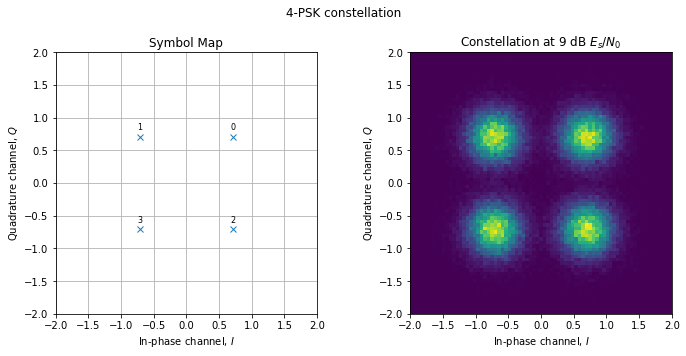

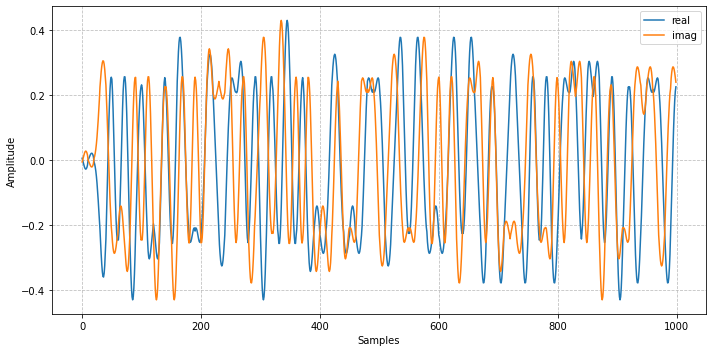

In [4]:
analyze_psk(4, 9, offset=45)

### 8-PSK

/home/matt/repos/sdr/src/sdr/plot/_modulation.py:68: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_215588/3575726410.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


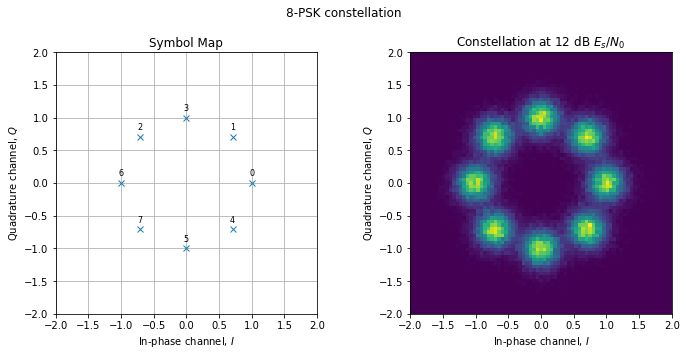

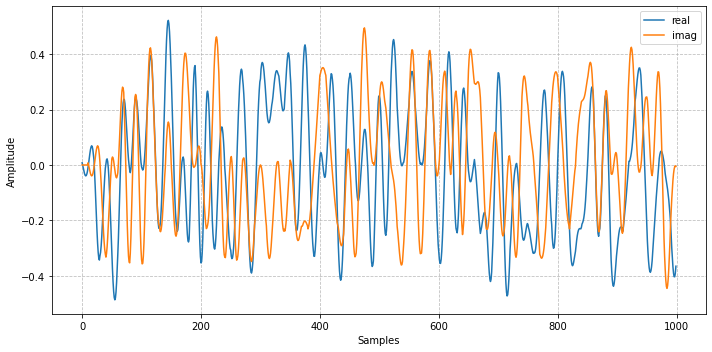

In [5]:
analyze_psk(8, 12)

### 16-PSK

/home/matt/repos/sdr/src/sdr/plot/_modulation.py:68: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_215588/3575726410.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


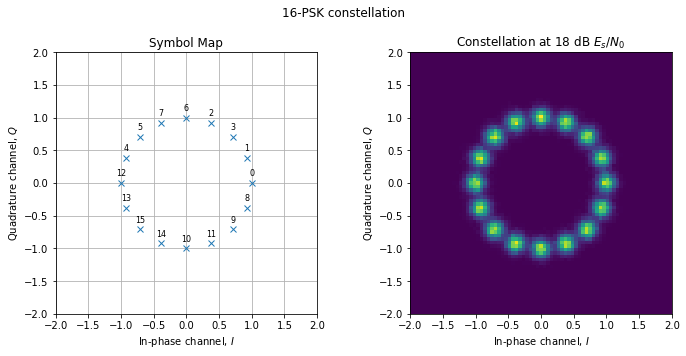

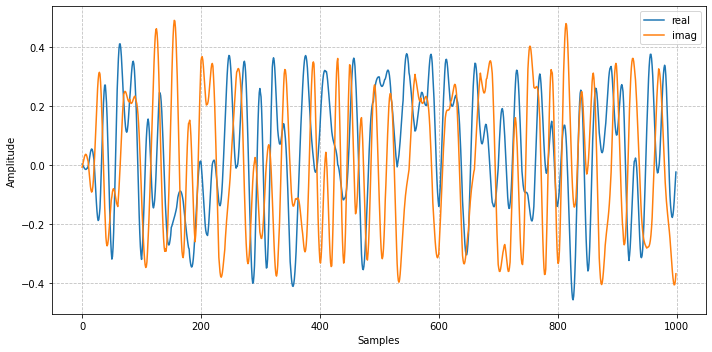

In [6]:
analyze_psk(16, 18)

## Error rate curves

In [7]:
def error_rates(order):
    psk = sdr.PSK(order)
    k = int(np.log2(order))  # Bits per symbol

    ebn0 = np.linspace(0, 10, 20)
    esn0 = ebn0 + 10 * np.log10(k)

    ber = sdr.ErrorRate()
    ser = sdr.ErrorRate()

    for i in range(esn0.size):
        N_symbols = int(1e6)
        s = np.random.randint(0, psk.order, N_symbols)
        x = psk.modulate(s)
        x_hat = sdr.awgn(x, snr=esn0[i])
        s_hat = psk.demodulate(x_hat)

        ber.add(ebn0[i], sdr.unpack(s, k), sdr.unpack(s_hat, k))
        ser.add(esn0[i], s, s_hat)

    return ber, ser

In [8]:
bpsk_ber, bpsk_ser = error_rates(2)
qpsk_ber, qpsk_ser = error_rates(4)
psk8_ber, psk8_ser = error_rates(8)
psk16_ber, psk16_ser = error_rates(16)

/home/matt/repos/sdr/src/sdr/plot/_modulation.py:210: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/home/matt/repos/sdr/src/sdr/plot/_modulation.py:210: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/home/matt/repos/sdr/src/sdr/plot/_modulation.py:210: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_215588/1318706638.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


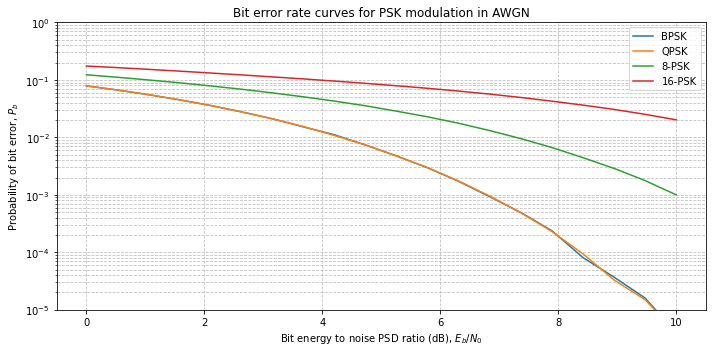

In [9]:
plt.figure(figsize=(10, 5))
sdr.plot.error_rate(*bpsk_ber.error_rates(), label="BPSK")
sdr.plot.error_rate(*qpsk_ber.error_rates(), label="QPSK")
sdr.plot.error_rate(*psk8_ber.error_rates(), label="8-PSK")
sdr.plot.error_rate(*psk16_ber.error_rates(), label="16-PSK")
plt.ylim(1e-5, 1e0)
plt.title("Bit error rate curves for PSK modulation in AWGN")
plt.tight_layout()
plt.show()

/home/matt/repos/sdr/src/sdr/plot/_modulation.py:210: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/home/matt/repos/sdr/src/sdr/plot/_modulation.py:210: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/home/matt/repos/sdr/src/sdr/plot/_modulation.py:210: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_215588/1775970088.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


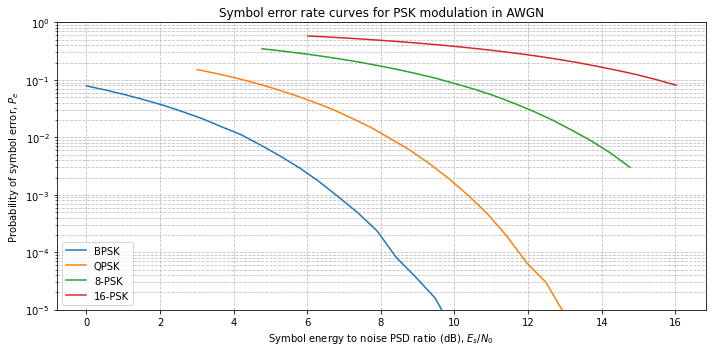

In [10]:
plt.figure(figsize=(10, 5))
sdr.plot.error_rate(*bpsk_ser.error_rates(), x_unit="esn0", y_unit="ser", label="BPSK")
sdr.plot.error_rate(*qpsk_ser.error_rates(), x_unit="esn0", y_unit="ser", label="QPSK")
sdr.plot.error_rate(*psk8_ser.error_rates(), x_unit="esn0", y_unit="ser", label="8-PSK")
sdr.plot.error_rate(*psk16_ser.error_rates(), x_unit="esn0", y_unit="ser", label="16-PSK")
plt.ylim(1e-5, 1e0)
plt.title("Symbol error rate curves for PSK modulation in AWGN")
plt.tight_layout()
plt.show()